In [75]:
import json
from pathlib import Path
import conllu
from io import open
from conllu import parse_incr

In [76]:
from io import open
from pathlib import Path
from conllu import parse_incr
from conllu import parse

In [262]:
data_file = open("en_gum-ud-train.conllu", "r", encoding="utf-8")
sents = Path("en_gum-ud-train.conllu").read_text().strip().split('\n\n')

In [263]:
relative_clauses = []

for sent in sents:
    for token in parse(sent):
        for i, t in enumerate(token):
            if t['deprel'] =='acl:relcl':
                head_id = int(t['head'])-1
                head = token[head_id]['xpos']
                if head not in ['WDT', 'WP']:
                    relative_clauses.append(sent)
relative_clauses = set(relative_clauses)

In [264]:
print(len(relative_clauses))

1630


In [265]:
with open('relative.txt', 'w') as relative:
    for sent in relative_clauses:
        for s in sent.split('\n'):
            if s.startswith('# text = '):
                raw = s[len('# text ='):]
                relative.write(f'{raw}\n')

In [266]:
with open('relative.conllu', 'w') as conllu:
    for sent in relative_clauses:
        conllu.write(f'{sent}\n\n')

In [267]:
file = open('relative.conllu', 'r')
sents = [x for x in parse_incr(file)]

In [72]:
from collections import Counter
possible_rel=[]
pc =[]
prc =[]
advc =[]
advrc =[]
sc =[]
src =[]
oc =[]
orc =[]
others =[]
others_r =[]
m =[]
relative_clauses = list(relative_clauses)
print(len(relative_clauses))
for j, sent in enumerate(sents):

    tokens = [tok for tok in sent]
    for i, token in enumerate(sent):
        if token['deprel']=='acl:relcl':
            id = token['id']
            head_tok = [x for x in tokens if x['id']==token['head']][0]
            head_tok_dep = [x[0] for x in head_tok['deps'] if x[1]==id]
            dependents = [x['feats'] for x in tokens if x['head']==id]
            print(dependents)
            dependents =[x for x in dependents if x!=None and 'Rel' in list(x.values())]
            if head_tok_dep:
                dep = head_tok_dep[0]
                if 'pass' in dep and dependents!=[]:
                    pc.append(relative_clauses[j])
                elif 'pass' in dep:
                    prc.append(relative_clauses[j])
                elif 'nsubj' in dep and dependents!=[]:
                    sc.append(relative_clauses[j])
                elif 'nsubj' in dep:
                    src.append(relative_clauses[j])
                elif 'obj' in dep and dependents!=[]:
                    oc.append(relative_clauses[j])
                elif 'obj' in dep:
                    orc.append(relative_clauses[j])
                elif 'obl' in dep and dependents!=[]:
                    advc.append(relative_clauses[j])
                elif 'obl' in dep:
                    advrc.append(relative_clauses[j])
                else:
                    m.append(relative_clauses[j])
#                   subject_clause.append(re)
                possible_rel.append(head_tok_dep[0])
            else:
                if dependents:
                    others.append(relative_clauses[j])
                else:
                    others_r.append(relative_clauses[j])

print(Counter(possible_rel).most_common())
print(len(possible_rel))
print(len(others))

In [268]:
import matplotlib.pyplot as plt

# Data
labels = ['PC', 'PRC', 'ADVC', 'ADVRC', 'SC', 'SRC', 'OC',  'Others', 'Others_r', 'M']
sizes = [len(pc), len(prc), len(advc), len(advrc), len(sc), len(src), len(oc), len(others), len(others_r), len(m)]

# Plot
fig, ax = plt.subplots()
bars = ax.bar(labels, sizes)

# Adding value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 1, yval, ha='center', va='bottom')

ax.set_ylabel('Size')
ax.set_title('Size of Each List')
plt.show()

[('nsubj', 755), ('obj', 175), ('nsubj:pass', 98), ('obl', 83), ('obl:in', 9), ('obl:tmod', 6), ('obl:of', 5), ('obl:npmod', 4), ('obl:with', 3), ('obl:for', 3), ('nsubj:outer', 2), ('obl:at', 2), ('xcomp', 1), ('obl:from', 1), ('obl:into', 1), ('obl:besides', 1), ('obl:on', 1), ('ccomp', 1), ('obl:off_of', 1)]
1152
67


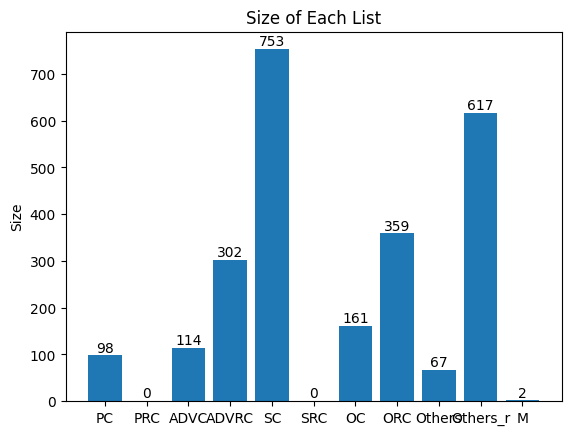

In [296]:
def save_relative_split(file_name, relative_split):
    with open(file_name, 'w') as relative:
        for sent in relative_split:
            for s in sent.split('\n'):
                if s.startswith('# text = '):
                    raw = s[len('# text ='):]
                    relative.write(f'{raw}\n')

In [297]:
save_relative_split('relative_gum/advc.txt', advc)
save_relative_split('relative_gum/others_r.txt', others_r)
save_relative_split('relative_gum/others.txt', others)
save_relative_split('relative_gum/sc.txt', sc)
save_relative_split('relative_gum/oc.txt',oc)
save_relative_split('relative_gum/pc.txt',pc)

In [295]:
def save_relative_conllu(file_name, relative_split):
    with open(file_name, 'w') as relative:
        for sent in relative_split:
            relative.write(f'{sent}\n\n')

In [298]:
save_relative_conllu('relative_gum/advc.conllu', advc)
save_relative_conllu('relative_gum/others_r.conllu', others_r)
save_relative_conllu('relative_gum/others.conllu', others)
save_relative_conllu('relative_gum/sc.conllu', sc)
save_relative_conllu('relative_gum/oc.conllu',oc)
save_relative_conllu('relative_gum/pc.conllu',pc)

# EUD

In [300]:
reduced = open('relative_gum/others_r.conllu', 'r')
sents_reduced = [x for x in parse_incr(reduced)]

In [154]:
relative_dependent_all =[]
for sent in sents_reduced:
    relative_sents_dependent = []
    for token in sent:
        relative_dependent = []
        if token['deprel'] =='acl:relcl':
            head_dep = [x for x in sent if x['id']==token['head']][0]
            if head_dep['deps'] and head_dep['xpos'] not in ['WDT', 'WP']: 
                head = [x[1] for y in sent if y['id'] ==token['head'] for x in y['deps']]
               
                if token['id'] not in head:
                    depents = [x['deprel'] for x in sent if x['head'] == token['id']]
                # relative_dependent.append(depents)
            
                    relative_sents_dependent.append(depents)
    relative_dependent_all.append(relative_sents_dependent)

In [274]:
relative_dependent_all

In [275]:
len(relative_dependent_all)

In [292]:
for i, rel in enumerate(relative_dependent_all):
    for r in rel:
        if 'nsubj' not in r and 'nsubj:pass' not in r:
            print(i)
            print(rel)
            

In [293]:
others_r = Path('relative_gum/others_r.conllu').read_text().strip().split('\n\n')

In [294]:
print(others_r[62]) #incorrect annotation  what

In [98]:
print(others_r[169]) # incorrect annotation   that

# sent_id = GUM_news_warhol-46
# s_prominence = 1
# s_type = decl
# transition = continue
# text = Warhol was close to important touchstones of the 1960s, including art, music, consumer culture, fashion, and celebrity worship, which were all buzzwords and images Wikinews observed at USI's opening exhibit.
# newpar
# newpar_block = p (1 s)
1	Warhol	Warhol	PROPN	NNP	Number=Sing	3	nsubj	3:nsubj	Discourse=joint-other_m:94->11:9|Entity=(2-person-giv:act-cf1*-1-coref-Andy_Warhol)
2	was	be	AUX	VBD	Mood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin	3	cop	3:cop	_
3	close	close	ADV	RB	Degree=Pos	0	root	0:root	_
4	to	to	ADP	IN	_	6	case	6:case	_
5	important	important	ADJ	JJ	Degree=Pos	6	amod	6:amod	Entity=(166-person-new-cf11-2-sgl
6	touchstones	touchstone	NOUN	NNS	Number=Plur	3	obl	3:obl:to	_
7	of	of	ADP	IN	_	9	case	9:case	_
8	the	the	DET	DT	Definite=Def|PronType=Art	9	det	9:det	Entity=(167-time-acc:com-cf6-2-sgl
9	1960s	1960s	NOUN	NNS	Number=Plur	6	nmod	6:nmod:of	Entity=167)166)|SpaceAfter=No

In [307]:
print(others_r[371]) # incorrect annotation

In [308]:
print(others_r[217])

{'0': [{'type': 'reentrancy:primary',
   'tokens': [8],
   'nodes': [],
   'edges': [['1.1.2.1.1.1', ':ARG2', '1.1.2.1.1.1.2']]},
  {'type': 'reentrancy:primary',
   'tokens': [25],
   'nodes': [],
   'edges': [['1.2.3.1', ':ARG1', '1.2.2']]},
  {'type': 'reentrancy:primary',
   'tokens': [8],
   'nodes': [],
   'edges': [['1.1.2.1.1.1', ':ARG1', '1.1.2.1.1.1.1']]},
  {'type': 'reentrancy:primary',
   'tokens': [1],
   'nodes': [],
   'edges': [['1.1', ':ARG0', '1.1.1']]},
  {'type': 'reentrancy:coref',
   'tokens': [16],
   'nodes': [],
   'edges': [['1.1.2.1.1.1.2.1.2.1.2', ':ARG1', '1.1.2.1.1.1.2']],
   'string': "reentrancy:coref : their => ('dedicate-01', ':ARG1', 'person')"},
  {'type': 'reentrancy:coref',
   'tokens': [13],
   'nodes': [],
   'edges': [['1.1.2.1.1.1.2.1.2.1.1', ':ARG1', '1.1.2.1.1.1.2']],
   'string': "reentrancy:coref : it => ('capable-01', ':ARG1', 'person')"},
  {'type': 'reentrancy:coref',
   'tokens': [11],
   'nodes': [],
   'edges': [['1.1.2.1.1.1.2.1', '

In [113]:
print(others_r[167])

# sent_id = GUM_interview_shalev-70
# s_prominence = 1
# s_type = decl
# speaker = AnerShalev
# transition = continue
# text = I think by using emails on the one hand which are more the voice of the woman Eva and narrative which is more the perspective of the man Adam, I kind of confront them, their different perspective and then kind somehow you can see the distortions in the way the story is told.
1	I	I	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	2	nsubj	2:nsubj	Discourse=attribution-positive:149->150:3|Entity=(3-person-giv:act-cf1*-1-ana-Aner_Shalev)
2	think	think	VERB	VBP	Mood=Ind|Number=Sing|Person=1|Tense=Pres|VerbForm=Fin	34	ccomp	34:ccomp	_
3	by	by	SCONJ	IN	_	4	mark	4:mark	Discourse=joint-other_m:150->143:2
4	using	use	VERB	VBG	VerbForm=Ger	2	advcl	2:advcl:by	_
5	emails	email	NOUN	NNS	Number=Plur	4	obj	4:obj|14:nsubj	Entity=(135-abstract-giv:inact-cf6-1-coref
6	on	on	ADP	IN	_	9	case	9:case	_
7	the	the	DET	DT	Definite=Def|PronType=Art	9	det	9:det	_
8	one	one	NUM	CD	NumFo

In [121]:
print(others_r[14]) # annotation error

# sent_id = GUM_academic_lighting-8
# s_prominence = 4
# s_type = decl
# transition = establishment
# text = There are different type of lighting bulbs used at home can affect the overall lighting consumption.
1	There	there	PRON	EX	PronType=Dem	2	expl	2:expl	Discourse=context-background:11->14:1
2	are	be	VERB	VBP	Mood=Ind|Number=Plur|Person=3|Tense=Pres|VerbForm=Fin	0	root	0:root	_
3	different	different	ADJ	JJ	Degree=Pos	4	amod	4:amod	Entity=(31-abstract-new-cf3-2-sgl
4	type	type	NOUN	NN	Number=Sing|Typo=Yes	2	nsubj	2:nsubj	CorrectForm=types|XML=<sic ana:::"types"></sic>
5	of	of	ADP	IN	_	7	case	7:case	_
6	lighting	lighting	NOUN	NN	Number=Sing	7	compound	7:compound	Entity=(32-object-new-cf5-2-sgl
7	bulbs	bulb	NOUN	NNS	Number=Plur	4	nmod	4:nmod:of	_
8	used	use	VERB	VBN	Tense=Past|VerbForm=Part	7	acl	7:acl	Discourse=elaboration-attribute:12->11:0
9	at	at	ADP	IN	_	10	case	10:case	_
10	home	home	NOUN	NN	Number=Sing	8	obl	8:obl:at	Entity=(30-place-giv:act-cf1*-1-coref)32)31)
11	can	can	AUX	M

In [122]:
print(others_r[62])

# sent_id = GUM_vlog_hair-49
# s_prominence = 4
# s_type = sub
# speaker = Shawnta
# transition = smooth-shift
# text = So I could not come out with a cream and tell you guys just – "You can use it on your wash-n-go's" when that would kinda go against all that I've always said on my channel, which is "Gels actually are what make your wash-n-go stay."
1	So	so	ADV	RB	_	5	advmod	5:advmod	Discourse=adversative-concession:102->98:0
2	I	I	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	5	nsubj	5:nsubj|11:nsubj	Entity=(3-person-giv:act-cf1*-1-ana)
3	could	could	AUX	MD	VerbForm=Fin	5	aux	5:aux|11:aux	_
4	not	not	PART	RB	Polarity=Neg	5	advmod	5:advmod	_
5	come	come	VERB	VB	VerbForm=Inf	0	root	0:root	_
6	out	out	ADP	RP	_	5	compound:prt	5:compound:prt	_
7	with	with	ADP	IN	_	9	case	9:case	_
8	a	a	DET	DT	Definite=Ind|PronType=Art	9	det	9:det	Entity=(61-substance-new-cf4-2-coref
9	cream	cream	NOUN	NN	Number=Sing	5	obl	5:obl:with	Entity=61)
10	and	and	CCONJ	CC	_	11	cc	11:cc	Discourse=attribution-

In [124]:
print(others_r[320]) # incorrect annotation?

# sent_id = GUM_voyage_sydfynske-45
# s_prominence = 3
# s_type = multiple
# transition = null
# text = Islands in the archipelago listed in east to west order; note that there are many more islands and islets in the area, but these are the ones with ferry traffic that are possible to visit without making special arrangements.
# newpar
# newpar_block = p (4 s)
1	Islands	island	NOUN	NNS	Number=Plur	0	root	0:root	Discourse=organization-preparation:128->159:6|Entity=(189-place-new-cf1-1-coref
2	in	in	ADP	IN	_	4	case	4:case	_
3	the	the	DET	DT	Definite=Def|PronType=Art	4	det	4:det	Entity=(1-place-giv:inact-cf2-2-coref-South_Funen_Archipelago
4	archipelago	archipelago	NOUN	NN	Number=Sing	1	nmod	1:nmod:in	Entity=1)
5	listed	list	VERB	VBN	Tense=Past|VerbForm=Part	1	acl	1:acl	Discourse=elaboration-attribute:129->128:0
6	in	in	ADP	IN	_	10	case	10:case	_
7	east	east	NOUN	NN	Number=Sing	10	nummod	10:nummod	Entity=(190-abstract-new-cf5-4-sgl(191-place-new-cf6-1-sgl)
8	to	to	ADP	IN	_	9	case	9:case	_

In [229]:
print(others_r[388])

In [239]:
print(others_r[100]) #TODO: recursion needed when xcomp appears

In [240]:
print(others_r[194]) #annotation error?

In [232]:
print(others_r[14])

1	And	and	CCONJ	CC	_	3	cc	3:cc	Discourse=explanation-justify:14->52:3
2	I	I	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	3	nsubj	3:nsubj	Entity=(2-person-giv:inact-cf1-1-ana)
3	remember	remember	VERB	VBP	Mood=Ind|Number=Sing|Person=1|Tense=Pres|VerbForm=Fin	0	root	0:root	_
4	this	this	DET	DT	Number=Sing|PronType=Dem	6	det	6:det	Entity=(4-object-acc:com-cf2-10-coref
5	pf-	pf-	INTJ	UH	_	6	reparandum	6:reparandum	_
6	cartoon	cartoon	NOUN	NN	Number=Sing	3	obj	3:obj|8:obj	_
7	I	I	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	8	nsubj	8:nsubj	Discourse=elaboration-attribute:15->14:0|Entity=(2-person-giv:act-cf1-1-ana)
8	saw	see	VERB	VBD	Mood=Ind|Number=Sing|Person=1|Tense=Past|VerbForm=Fin	6	acl:relcl	6:acl:relcl	_
9	w-	w-	INTJ	UH	_	17	reparandum	17:reparandum	SpaceAfter=No
10	,	,	PUNCT	,	_	9	punct	9:punct	_
11	of	of	ADP	IN	_	17	reparandum	17:reparandum	Discourse=same-unit_m:16->14:1|SpaceAfter=No
12	,	,	PUNCT	,	_	11	punct	11:punct	_
13	of	of	ADP	IN	_	17	reparandum	17:reparandum	

In [143]:
print(others_r[60]) #incorrect annotation

# sent_id = GUM_news_crane-7
# s_prominence = 3
# s_type = decl
# transition = null
# text = Photos released of the scene showed numerous bloodied bodies and various scattered debris.
1	Photos	photo	NOUN	NNS	Number=Plur	6	nsubj	6:nsubj	Discourse=elaboration-additional:15->11:2|Entity=(24-abstract-new-cf2-1-sgl
2	released	release	VERB	VBN	Tense=Past|VerbForm=Part	1	acl:relcl	1:acl:relcl	_
3	of	of	ADP	IN	_	5	case	5:case	_
4	the	the	DET	DT	Definite=Def|PronType=Art	5	det	5:det	Entity=(8-place-giv:inact-cf1-2-coref-Masjid_al%2DHaram
5	scene	scene	NOUN	NN	Number=Sing	2	obl	2:obl:of	Entity=8)24)
6	showed	show	VERB	VBD	Mood=Ind|Number=Plur|Person=3|Tense=Past|VerbForm=Fin	0	root	0:root	_
7	numerous	numerous	ADJ	JJ	Degree=Pos	9	amod	9:amod	Entity=(25-object-new-cf3-3-sgl
8	bloodied	bloody	VERB	VBN	Tense=Past|VerbForm=Part	9	amod	9:amod	_
9	bodies	body	NOUN	NNS	Number=Plur	6	obj	6:obj	Entity=25)
10	and	and	CCONJ	CC	_	13	cc	13:cc	_
11	various	various	ADJ	JJ	Degree=Pos	13	amod	13:amod	Entity=(26-

# leamr

In [212]:
import json

with open('output_sc_amrlib.reentrancy_alignments.json') as f:
   data = json.load(f)


1	All	all	ADV	RB	Degree=Pos	4	advmod	4:advmod	Discourse=joint-other_m:48->7:5
2	of	of	ADP	IN	_	4	case	4:case	_
3	a	a	DET	DT	Definite=Ind|PronType=Art	4	det	4:det	_
4	sudden	sudden	ADV	RB	Degree=Pos	8	obl	8:obl:of	_
5	a	a	DET	DT	Definite=Ind|PronType=Art	7	det	7:det	Entity=(50-event-new-cf2-3-coref
6	terrible	terrible	ADJ	JJ	Degree=Pos	7	amod	7:amod	_
7	wind	wind	NOUN	NN	Number=Sing	8	nsubj	8:nsubj	Entity=50)
8	blew	blow	VERB	VBD	Mood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin	0	root	0:root	_
9	up	up	ADP	RP	_	8	compound:prt	8:compound:prt	SpaceAfter=No
10	,	,	PUNCT	,	_	12	punct	12:punct	_
11	so	so	ADV	RB	_	12	advmod	12:advmod	_
12	strong	strong	ADV	RB	Degree=Pos	8	advmod	8:advmod	_
13	that	that	SCONJ	IN	_	15	mark	15:mark	Discourse=attribution-positive:49->50:2
14	I	I	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	15	nsubj	15:nsubj	Entity=(41-person-giv:act-cf1*-1-ana)
15	thought	think	VERB	VBD	Mood=Ind|Number=Sing|Person=1|Tense=Past|VerbForm=Fin	12	advcl	12:advcl:that	_
16	t

In [1]:
data

[1, 2, 3, 3, 4]

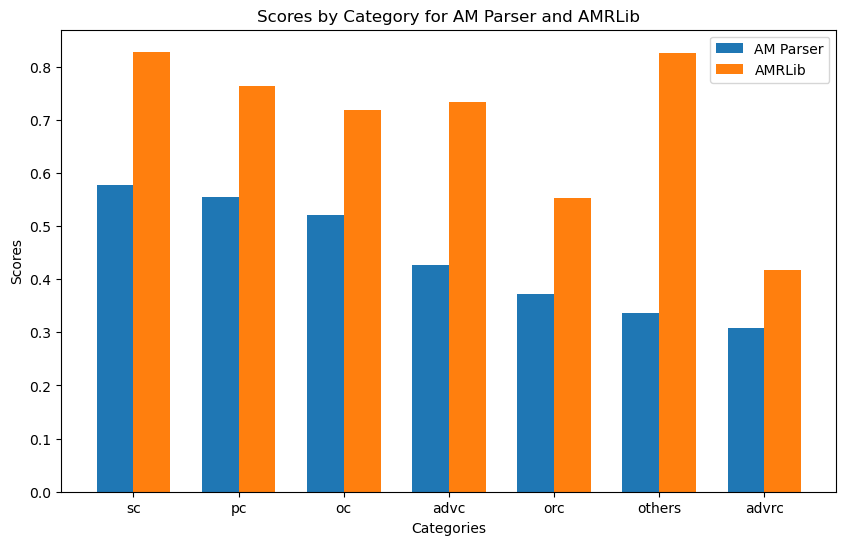